In [1]:
# Autosave after every 60 seconds
%autosave 60
# Display matplot plots inline
# %matplotlib inline

import os
pwd = 'C:\\Users\\ayush\\work\\event-types'
os. chdir(pwd)

Autosaving every 60 seconds


In [3]:
# Check if the GPU is being used or not
import keras
print (keras.backend.backend())
print (keras.backend.floatx())
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


tensorflow
float32


['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.list_devices()

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 1214091273116565501),
 _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 9218918974, 2700305343762311754)]

In [5]:
import pandas as pd

In [ ]:
# Read the train, validate and test set for all classes except "Other class"
# df_train = pd.read_csv("data/processed/all/train.csv")
# df_validate = pd.read_csv("data/processed/all/validate.csv")
# df_test = pd.read_csv("data/processed/all/test.csv")

In [ ]:
# Read the train, validate and test set for all classes except "Other class"
# df_others_train = pd.read_csv("data/processed/external/others_train.csv")
# df_others_validate = pd.read_csv("data/processed/external/others_validate.csv")
# df_others_test = pd.read_csv("data/processed/external/others_test.csv")

In [6]:
# Important columns in the data
msg_column = 'EVENT_TEXT'
msg_clean_column = 'EVENT_TEXT_CLEANED'
topic_column = 'TOPIC'
group_column = 'GROUP'
type_column = 'TYPE'
topic_group_column = topic_column + group_column
topic_group_type_column = topic_column + group_column + type_column

In [ ]:
# df_others_train[topic_group_type_column] = 'Others'
# df_others_validate[topic_group_type_column] = 'Others'
# df_others_test[topic_group_type_column] = 'Others'

In [ ]:
# df_validate[topic_group_type_column].value_counts()

In [ ]:
# df_train.isnull().sum(axis = 0)

In [ ]:
# df_validate.isnull().sum(axis = 0)

In [ ]:
# df_test.isnull().sum(axis = 0)

In [ ]:
# Tokenize the text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 13 # 90 percentile of number of words in each EVENT_TEXT
def prepare_train_data():
    # Maximum number of words to be considered by tokenizer
    MAX_NB_WORDS = 861744 - 404327 #(all words - words with frequency less than 3) 
    tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
    # print (tokenizer)
    # We will only tokenize on train data
    train_text = df_train[msg_clean_column].append(df_others_train[msg_clean_column]) 
    print (len(train_text))
    tokenizer.fit_on_texts(train_text)
    word_index = tokenizer.word_index # {'decaux': 37678,}
    print (len(word_index))
    train_sequences = tokenizer.texts_to_sequences(train_text)
    print (len(train_sequences[0]))
    print (train_sequences[0])
    train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print (train_data.shape)
    return tokenizer, word_index, train_data

In [ ]:
tokenizer, word_index, train_data = prepare_train_data()

In [ ]:
def prepare_word_index():
    # Maximum number of words to be considered by tokenizer
    MAX_NB_WORDS = 861744 - 404327 #(all words - words with frequency less than 3) 
    tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
    # print (tokenizer)
    # We will only tokenize on train data
    train_text = df_train[msg_clean_column].append(df_others_train[msg_clean_column]) 
    print (len(train_text))
    tokenizer.fit_on_texts(train_text)
    word_index = tokenizer.word_index # {'decaux': 37678,}
    return tokenizer, word_index

In [ ]:
# tokenizer_2, word_index_2 = prepare_word_index()

In [ ]:
tokenizer_2.word_counts.get("apple")

In [ ]:
tokenizer_2.texts_to_sequences(["brexit", "aaaaand", "apple", "protozoan"])

In [ ]:
# print (len(df_train))
# print (len(df_validate))
# print (len(df_test))

In [ ]:
confi = tokenizer_2.get_config()

In [ ]:
confi.keys()

In [ ]:
print (confi.get('num_words'))

In [ ]:
def count_word_frequency():
    sorted_d = sorted((value, key) for (key,value) in tokenizer.word_counts.items())
    count = 0
    # least_frequency_words = []
#     f = open("data/vocabulary/all/greater_than_100.txt","w")
#     f.write("Words with greater than or equal to 100 occurrence in the vocabulary\n")
    for x in sorted_d:
        if x[0] < 2 :
            count = count +1
#             f.write("%s\n" %(x[1]))
#     f.close()        
    print (count)


In [ ]:
count_word_frequency()

In [ ]:
# # word_counts = type(confi.get('word_counts'))
# counts_word =  {v: k for k, v in tokenizer.word_counts.items()}
# od = collections.OrderedDict(sorted(d.items()))

In [ ]:
# Create the word embeddings
import numpy as np
EMBEDDING_DIMENSION = 300
def make_embeddings(embeddings_path):
    file_1 = open("data/vocabulary/all/in_word_embedding_with_frequency_more_than_2.txt","w+")
    file_2 = open("data/vocabulary/all/not_in_word_embedding_with_frequency_more_than_2.txt","w+")
    with open(embeddings_path, encoding="utf-8") as f:
        embeddings_index = {}
        for line in f:
            values = line.split(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float16')
            embeddings_index[word] = coefs
    index_word = {word_index[x]: x for x in word_index}
    index_word[0] = 'unk'

    embedding_dimension = EMBEDDING_DIMENSION
    count_1 = 0
    count_2 = 0
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimension))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            count_1 = count_1 + 1
            file_1.write("%s\n" %(word))
        else :
            count_2 = count_2 +1
            file_2.write("%s\n" %(word))
    
    print('Number of words which in embedding are %s .' % count_1)
    print('Number of words which are not in embedding are %s .' % count_2)
    return embedding_matrix

In [ ]:
embedding_matrix = make_embeddings("data/embeddings/Common Crawl/glove.840B.300d/glove.840B.300d.txt")
print (embedding_matrix.shape)

In [ ]:
# Save the embeddings
import pickle
pickle.dump(embedding_matrix, open('data/embeddings/28_05_word_embeddings', 'wb'))
pickle.dump(old_embedding_matrix, open('data/embeddings/28_05_old_word_embeddings', 'wb'))

In [ ]:
# Save the tokenizer
pickle.dump(tokenizer, open('data/tokenizer/28_05_tokenizer', 'wb'))

In [ ]:
# word_index.get("protozoan")

In [ ]:
# tokenizer.texts_to_sequences(["protozoan"])

In [ ]:
# embedding_matrix[word_index.get("protozoan")]

In [ ]:
# print (embedding_matrix[1][0:10])

In [ ]:
# old_embedding_matrix = embedding_matrix

In [ ]:
# old_embedding_matrix

In [ ]:
# embedding_matrix[1][0:10]

In [ ]:
# word_index.get("aadande")

In [ ]:
# len(np.where(~embedding_matrix.any(axis=1))[0])

In [ ]:
# Intersection between list which are not in embedding and list of least occuring word in the tokenizer

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

def common_elements_in_least_occuring_word_and_not_in_embedding_word():
    file = open("data/vocabulary/all/2.txt")
    list_2 = []
    for line in file:
        list_2.append(line.strip("\n"))
    file.close()
    print (list_2[1:4])

    file = open("data/vocabulary/all/in_word_embedding_with_frequency_more_than_2.txt")
    no_embedding_list = []
    for line in file:
        no_embedding_list.append(line.strip("\n"))
    file.close()
    print (no_embedding_list[1:4])
    print (len(intersection(list_2, no_embedding_list)))
    return intersection(list_2, no_embedding_list)

# inter_list = common_elements_in_least_occuring_word_and_not_in_embedding_word()
# file = open("data/vocabulary/4_not_in_embedding", "w+")
# file.write("words which have frequency less than 5 and are not in word embedding\n")
# for line in inter_list:
#     file.write("%s\n" %line)
# file.close()

In [ ]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [61]:
%reload_ext autoreload
from src.models import hierarchical_attention_model

In [30]:
df_train = pd.read_csv("data/processed/all/train.csv", usecols = [topic_group_type_column])
nb_classes = df_train[topic_group_type_column].nunique() + 1
del df_train
activation = 'softmax'
from keras.metrics import categorical_accuracy
from keras.losses import categorical_crossentropy
metrics = ['categorical_accuracy']
loss = 'categorical_crossentropy'

In [31]:
nb_classes

201

In [ ]:
# from keras.layers.embeddings import Embedding
# ?Embedding

In [32]:
embedding_matrix = pickle.load(open('data/embeddings/28_05_word_embeddings', 'rb'))

In [64]:
loss = 'categorical_crossentropy'
max_senten_num = 1 # Every document has only 1 sentence
model = hierarchical_attention_model.create_hierarchical_attention_model(MAX_SEQUENCE_LENGTH, 
                                                                         max_senten_num, nb_classes, activation, metrics, loss, embedding_matrix )

In [65]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1, 13)             0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 200)            259125126 
_________________________________________________________________
bidirectional_8 (Bidirection (None, 1, 300)            421200    
_________________________________________________________________
attention_with_context_8 (At (None, 300)               302       
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 201)               60501     
Total params: 259,607,129
Trainable params: 259,607,129
Non-trainable params: 0
______________________________________________________________

In [69]:
from keras.utils import plot_model
plot_model(model, to_file='reports/figures/models/model.png')

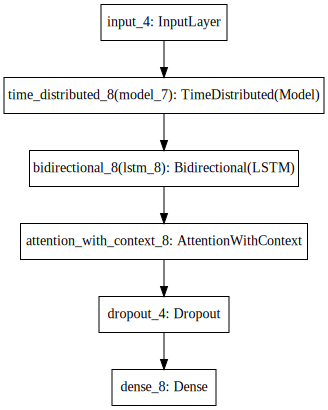

In [66]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
# dir()

In [7]:
# Prepare the y_train
from sklearn.preprocessing import LabelBinarizer
def prepare_y_train():
    df_train = pd.read_csv("data/processed/all/train.csv", usecols = [msg_clean_column, topic_group_type_column])
    df_others_train = pd.read_csv("data/processed/external/others_train.csv", usecols = [msg_clean_column])
    df_others_train[topic_group_type_column] = 'Others'
#     topic_group_type_labels = 
#     print (len(topic_group_type_labels))
    encoder = LabelBinarizer(sparse_output = True)
    y_train = encoder.fit_transform(list(df_train[topic_group_type_column]) + list(df_others_train[topic_group_type_column]))
    print (len(encoder.classes_))
#     print (y_train[0])
#     print (y_train.shape)
    return encoder, y_train

In [8]:
encoder, y_train = prepare_y_train()

201


56

In [ ]:
# df_train= df_train.drop([msg_column, topic_column, group_column, type_column, topic_group_column], axis=1)
# df_validate = df_validate.drop([msg_column, topic_column, group_column, type_column, topic_group_column], axis=1)
# df_others_train = df_others_train.drop([msg_column], axis=1)
# df_others_validate = df_others_validate.drop([msg_column], axis=1)

In [ ]:
# import sys
# sys.getsizeof(df_train)/(1024*1024*1024)

In [ ]:
df_validate.columns

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
MAX_SEQUENCE_LENGTH = 13
def prepare_x_train():
    tokenizer = pickle.load(open('data/tokenizer/28_05_tokenizer', 'rb'))
    print (len(tokenizer.word_index))
    df_train = pd.read_csv("data/processed/all/train.csv", usecols = [msg_clean_column])
    df_others_train = pd.read_csv("data/processed/external/others_train.csv", usecols = [msg_clean_column])
    train_sequences = tokenizer.texts_to_sequences(df_train[msg_clean_column].append(df_others_train[msg_clean_column]) )
    print (len(train_sequences[0]))
    print (train_sequences[0])
    train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print (train_data.shape)
    train_data = np.asarray(train_data)
    train_data = np.expand_dims(train_data, axis=1)
    return train_data

In [21]:
x_train = prepare_x_train()
print (x_train.shape)

861744
10
[62981, 49, 29, 4738, 660, 761, 152, 42, 69, 81]
(60034514, 13)
(60034514, 1, 13)


In [22]:
# sys.getsizeof(x_train)

128

In [27]:
# Prepare y_val
def prepare_y_val():
    df_validate = pd.read_csv("data/processed/all/validate.csv", usecols = [topic_group_type_column])
    df_others_validate = pd.read_csv("data/processed/external/others_validate.csv", usecols = [msg_clean_column])
    df_others_validate[topic_group_type_column] = 'Others'
    return encoder.transform(list(df_validate[topic_group_type_column]) + list(df_others_validate[topic_group_type_column]))

In [28]:
y_val = prepare_y_val()
print (y_val.shape)

(7504189, 201)


In [25]:
def prepare_x_val():
    df_validate = pd.read_csv("data/processed/all/validate.csv", usecols = [msg_clean_column])
    df_others_validate = pd.read_csv("data/processed/external/others_validate.csv", usecols = [msg_clean_column])
    tokenizer = pickle.load(open('data/tokenizer/28_05_tokenizer', 'rb'))
    print (len(tokenizer.word_index))
    val_sequences = tokenizer.texts_to_sequences(df_validate[msg_clean_column].append(df_others_validate[msg_clean_column]) )
    print (len(val_sequences[0]))
    val_data = pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    val_data = np.asarray(val_data)
    val_data = np.expand_dims(val_data, axis=1)
    print (val_data.shape)
    return val_data

In [26]:
x_val = prepare_x_val()

861744
4
(7504189, 1, 13)


In [ ]:
# Did you make a copy of the embedding matrix?

In [ ]:
# del df_train, df_others_train, df_validate, df_others_validate

In [38]:
# Train the DL model
# Early Stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
early_stopping = EarlyStopping(patience=1, verbose=1)

checkpointer = ModelCheckpoint(
    filepath='models/model-weights' + "-" + "{epoch:02d}-" + "{val_loss:.2f}" + str(
        time.time()) + ".hdf5",
    verbose=1, save_best_only=False)

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), nb_epoch=10, batch_size=1000,
                    verbose=1, callbacks = [early_stopping, checkpointer])

Instructions for updating:
Use tf.cast instead.


C:\Users\ayush\.conda\envs\event-type\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]
C:\Users\ayush\.conda\envs\event-type\lib\site-packages\tensorflow\python\ops\gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 258523500 elements. This may consume a large amount of memory.
  num_elements)


Train on 60034514 samples, validate on 7504189 samples
Epoch 1/10
60034514/60034514 [==============================] - 10430s 174us/step - loss: 0.0610 - categorical_accuracy: 0.9828 - val_loss: 0.0348 - val_categorical_accuracy: 0.9893

Epoch 00001: saving model to models/model-weights-01-0.031559132243.0013597.hdf5
Epoch 2/10
60034514/60034514 [==============================] - 10329s 172us/step - loss: 0.0363 - categorical_accuracy: 0.9893 - val_loss: 0.0330 - val_categorical_accuracy: 0.9899

Epoch 00002: saving model to models/model-weights-02-0.031559132243.0013597.hdf5
Epoch 3/10
60034514/60034514 [==============================] - 10320s 172us/step - loss: 0.0344 - categorical_accuracy: 0.9898 - val_loss: 0.0337 - val_categorical_accuracy: 0.9899

Epoch 00003: saving model to models/model-weights-03-0.031559132243.0013597.hdf5
Epoch 00003: early stopping


In [39]:
pickle.dump(embedding_matrix, open('data/embeddings/28_05_after_training_word_embeddings', 'wb'))

In [ ]:
# len(df_train) + len(df_others_train)

In [41]:
# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [ ]:
# model.save_weights("models/topic_group-type_model-weights.hdf5")

In [ ]:
# del x_train, y_trainx_valalidate, y_validate

In [44]:
def prepare_x_test():
    df_test = pd.read_csv("data/processed/all/test.csv", usecols = [msg_clean_column])
    df_others_test = pd.read_csv("data/processed/external/others_test.csv", usecols = [msg_clean_column])
    tokenizer = pickle.load(open('data/tokenizer/28_05_tokenizer', 'rb'))
    test_sequences = tokenizer.texts_to_sequences(df_test[msg_clean_column].append(df_others_test[msg_clean_column]))
    print (len(tokenizer.word_index))
    print (len(test_sequences[0]))
    test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    test_data = np.asarray(test_data)
    test_data = np.expand_dims(test_data, axis=1)
    print (test_data.shape)
    return test_data

In [45]:
x_test = prepare_x_test()

861744
12
(7504472, 1, 13)


In [46]:
# Prepare y_test
def prepare_y_test():
    df_test = pd.read_csv("data/processed/all/test.csv", usecols = [topic_group_type_column])
    df_others_test = pd.read_csv("data/processed/external/others_test.csv", usecols = [msg_clean_column])
    df_others_test[topic_group_type_column] = 'Others'
    return encoder.transform(list(df_test[topic_group_type_column]) + list(df_others_test[topic_group_type_column]))

In [47]:
y_test = prepare_y_test()

In [48]:
loss, acc = model.evaluate(x_test,y_test)
print("Test set accuracy: ",acc)
print("Test set loss: ", loss)

7504472/7504472 [==============================] - 3025s 403us/step
Test set accuracy:  0.9898340616101973
Test set loss:  0.03381575600489638


In [49]:
y_pred = model.predict(x_test)
y_pred.shape

(7504472, 201)

In [ ]:
# ?LabelBinarizer.inverse_transform

In [50]:
def get_y_pred_class():
    return encoder.inverse_transform(y_pred)


In [53]:
def get_y_true_class():
    df_test = pd.read_csv("data/processed/all/test.csv")
    df_others_test = pd.read_csv("data/processed/external/others_test.csv")
    df_others_test[topic_group_type_column] = 'Others'
    return list(df_test[topic_group_type_column]) + list(df_others_test[topic_group_type_column])

In [54]:
y_true_class = get_y_true_class()
y_pred_class = get_y_pred_class()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification_report(y_true_class, y_pred_class)

In [57]:
file = open("reports/scores/classification_report.txt", "w")
file.write(classification_report(y_true_class, y_pred_class))
file.close()

## Check if the embedding matrix changed after training

In [116]:
def check_embedding_matrix_training():
    # word "quarter" is in word embedding and 'brexit' is not in word embedding
    tokenizer = pickle.load(open('data/tokenizer/28_05_tokenizer', 'rb'))
    pre_trained_word_embedding = pickle.load(open('data/embeddings/28_05_old_word_embeddings', 'rb'))
    post_trained_word_embedding = pickle.load(open('data/embeddings/28_05_after_training_word_embeddings', 'rb'))
    print (tokenizer.word_index.get('earnings'))
    old = pre_trained_word_embedding[tokenizer.word_index.get('earnings')]
    new = post_trained_word_embedding[tokenizer.word_index.get('earnings')]

#     new = post_trained_word_embedding[tokenizer.word_index.get('brexit')]
#     old = pre_trained_word_embedding[tokenizer.word_index.get('brexit')]
    print (new[0:10])
    print (old[0:10])
    print ((old==new).all())
#     print (post_trained_word_embedding[tokenizer.word_index.get('quarter')])

In [117]:
check_embedding_matrix_training()

55
[-0.89941406  0.5859375  -0.19848633  0.35205078  0.01983643  0.04190063
 -0.31787109  0.05114746  0.58349609  1.94042969]
[-0.89941406  0.5859375  -0.19848633  0.35205078  0.01983643  0.04190063
 -0.31787109  0.05114746  0.58349609  1.94042969]
True


## Get predictiopn on ER data

In [122]:
def predict_on_er_test_data():
    df_others_test = pd.read_csv("data/processed/external/others_test.csv", usecols = [msg_clean_column])
    tokenizer = pickle.load(open('data/tokenizer/28_05_tokenizer', 'rb'))
    test_sequences = tokenizer.texts_to_sequences(df_others_test[msg_clean_column])
#     print (len(tokenizer.word_index))
    print (len(test_sequences[0]))
    test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print (test_data[0])
    test_data = np.asarray(test_data)
    test_data = np.expand_dims(test_data, axis=1)
    y_pred = model.predict(test_data)
    y_pred_class = encoder.inverse_transform(y_pred)
    print (y_pred_class[0:10])
    if len(df_others_test) == len(y_pred_class):
        df_others_test['topic_group_type_prediction'] = y_pred_class
        df_others_test.to_csv("data/processed/external/others_test.csv", index = False)
#     return test_data

In [123]:
predict_on_er_test_data()

39
[  162 19979     6   799   162 52616     6   247    13  5673    17   162
  4551]
['business?products-services?clinical-trials-patient-enrollment'
 'society?legal?antitrust-suit' 'business?equity-actions?fundraising'
 'business?revenues?same-store-sales' 'business?labor-issues?union-pact'
 'business?labor-issues?union-pact'
 'business?products-services?market-entry'
 'business?products-services?grant' 'business?labor-issues?union-pact'
 'business?labor-issues?union-pact']
